# Simple

In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score


%matplotlib inline

In [52]:
df = pd.read_csv('simple.csv', sep=';')
df = df[['base', 'rate', 'fee']]
df = df.replace(regex=[','],value='.')
df = df.dropna()

In [53]:
df['base'] = pd.to_numeric(df['base'])
df['fee'] = pd.to_numeric(df['fee'])
df['rate'] = pd.to_numeric(df['rate'])

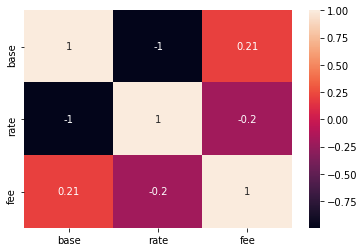

In [54]:
sns.heatmap(df.corr(), annot=True);

In [55]:
X = np.array(df[['base', 'rate']])

y = np.array(df['fee'])
y = pd.to_numeric(y)

In [56]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)

In [61]:
poly2 = PolynomialFeatures(degree=2, include_bias=True)
poly3 = PolynomialFeatures(degree=3, include_bias=True)
poly4 = PolynomialFeatures(degree=4, include_bias=True)

rmse_linear = 0
rmse_poly2 = 0
rmse_poly3 = 0
rmse_poly4 = 0
rmse_random_forest = 0

k_folds = 5
for fold in range(k_folds):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20)
    poly_features_train2 = poly2.fit_transform(X_train)
    poly_features_test2 = poly2.fit_transform(X_test)
    poly_features_train3 = poly3.fit_transform(X_train)
    poly_features_test3 = poly3.fit_transform(X_test)
    poly_features_train4 = poly4.fit_transform(X_train)
    poly_features_test4 = poly4.fit_transform(X_test)
    poly_reg_model2 = LinearRegression()
    poly_reg_model2.fit(poly_features_train2, y_train)
    poly_reg_model3 = LinearRegression()
    poly_reg_model3.fit(poly_features_train3, y_train)
    poly_reg_model4 = LinearRegression()
    poly_reg_model4.fit(poly_features_train4, y_train)
    
    y_pred2 = poly_reg_model2.predict(poly_features_test2)
    rmse_poly2 += mean_squared_error(y_test, y_pred2, squared=False)
    
    y_pred3 = poly_reg_model3.predict(poly_features_test3)
    rmse_poly3 += mean_squared_error(y_test, y_pred3, squared=False)

    y_pred4 = poly_reg_model4.predict(poly_features_test4)
    rmse_poly4 += mean_squared_error(y_test, y_pred4, squared=False)
    
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse_linear += mean_squared_error(y_test, y_pred, squared=False)
    
    reg_rf = RandomForestRegressor()
    reg_rf.fit(X_train, y_train)
    y_pred_rf = reg_rf.predict(X_test)
    rmse_random_forest += mean_squared_error(y_test, y_pred_rf, squared=False)
    
print('rmse_linear = ', rmse_linear/k_folds)
print('rmse_poly2 = ', rmse_poly2/k_folds)
print('rmse_poly3 = ', rmse_poly3/k_folds)
print('rmse_poly4 = ', rmse_poly4/k_folds)
print('rmse random forest = ', rmse_random_forest/k_folds)

rmse_linear =  24.39115866740679
rmse_poly2 =  0.0027974936725637632
rmse_poly3 =  0.0029326510055584032
rmse_poly4 =  0.003219551228698836
rmse random forest =  2.400225293735937


# With reference

In [62]:
df = pd.read_csv('reference.1.csv', sep=';')
df = df[['base', 'rate ID', 'period start', 'period end', 'fee']]
df['period start'] = pd.to_datetime(df['period start'])
df['period end'] = pd.to_datetime(df['period end'])
df['days_diff'] = (df['period end'] - df['period start']).dt.days
df['end_day'] = df['period end'].dt.day
df['start_day'] = df['period start'].dt.day
df['end_month'] = df['period end'].dt.month
df['start_month'] = df['period start'].dt.month

df.head()

,base,rate ID,period start,period end,fee,days_diff,end_day,start_day,end_month,start_month
0,"0,00",313d1da6-b871-4c3c-893b-54bd1c5b8cec,2021-02-17,2021-10-14,"0,00",239.0,14.0,17.0,10.0,2.0
1,"4587,00",f1d64162-1af0-4f79-b9a3-f5247ea07809,2021-07-13,2021-08-19,"8,37",37.0,19.0,13.0,8.0,7.0
2,"470,00",313d1da6-b871-4c3c-893b-54bd1c5b8cec,2021-05-09,2021-11-23,"3,05",198.0,23.0,9.0,11.0,5.0
3,"9347,00",240ee602-ad4f-4792-8ca8-ab813a2ea6b3,2021-05-20,2021-09-13,"8,91",116.0,13.0,20.0,9.0,5.0
4,"8310,00",1e760cd7-30f5-4e7b-a77e-3e678116a82a,2021-01-13,2021-01-31,"2,46",18.0,31.0,13.0,1.0,1.0


In [63]:
df2 = pd.read_csv('reference.2.csv', sep=';')
df2 = df2[['ID', 'Rate']]
dic_id_rate = {}
for ind in df2.index:
    rate_id = df2.loc[ind, 'ID']
    rate = df2.loc[ind, 'Rate']
    dic_id_rate[rate_id] = rate
df2.head()

,ID,Rate
0,313d1da6-b871-4c3c-893b-54bd1c5b8cec,"3,00"
1,5a3eb9fa-f7b5-4e44-8506-c4359050f980,"2,70"
2,1f1f54f1-6263-496c-9dbf-72fa5deef60f,"2,40"
3,2e88dfaa-e4ae-438b-90b3-b9af1e99e789,"2,10"
4,f1d64162-1af0-4f79-b9a3-f5247ea07809,"1,80"


In [64]:
df = df.replace({"rate ID": dic_id_rate})
df['rate'] = df['rate ID']
df = df.drop(['rate ID'], axis=1)

In [65]:
df = df.replace(regex=[','],value='.')
df.head()

,base,period start,period end,fee,days_diff,end_day,start_day,end_month,start_month,rate
0,0.00,2021-02-17,2021-10-14,0.00,239.0,14.0,17.0,10.0,2.0,3.00
1,4587.00,2021-07-13,2021-08-19,8.37,37.0,19.0,13.0,8.0,7.0,1.80
2,470.00,2021-05-09,2021-11-23,3.05,198.0,23.0,9.0,11.0,5.0,3.00
3,9347.00,2021-05-20,2021-09-13,8.91,116.0,13.0,20.0,9.0,5.0,0.30
4,8310.00,2021-01-13,2021-01-31,2.46,18.0,31.0,13.0,1.0,1.0,0.60


In [66]:
df = df.dropna()

In [69]:
df['base'] = pd.to_numeric(df['base'])
df['fee'] = pd.to_numeric(df['fee'])
df['rate'] = pd.to_numeric(df['rate'])
df['days_diff'] = pd.to_numeric(df['days_diff'])
df['end_day'] = pd.to_numeric(df['end_day'])
df['start_day'] = pd.to_numeric(df['start_day'])
df['end_month'] = pd.to_numeric(df['end_month'])
df['start_month'] = pd.to_numeric(df['start_month'])

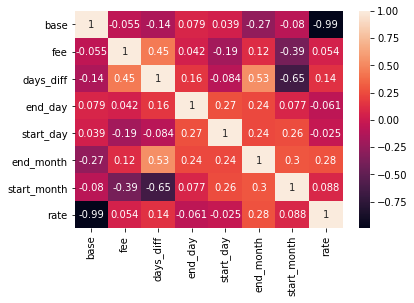

In [70]:
sns.heatmap(df.corr(), annot=True);

In [43]:
df.columns

Index(['base', 'period start', 'period end', 'fee', 'days_diff', 'end_day',
       'start_day', 'end_month', 'start_month', 'rate'],
      dtype='object')

In [75]:
X = np.array(df[['base', 'days_diff','rate', 'end_day',
       'start_day', 'end_month', 'start_month']])

y = np.array(df['fee'])
y = pd.to_numeric(y)

In [72]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)

In [76]:
k_folds = 5
rmse = 0
for fold in range(k_folds):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20)
    y_pred = X_train[:,0]*X_train[:,1]*X_train[:,2]/365
    rmse += mean_squared_error(y_train, y_pred, squared=False)
print(rmse/k_folds)

2798.572863071494


In [77]:
poly2 = PolynomialFeatures(degree=2, include_bias=True)
poly3 = PolynomialFeatures(degree=3, include_bias=True)
poly4 = PolynomialFeatures(degree=4, include_bias=True)

rmse_linear = 0
rmse_poly2 = 0
rmse_poly3 = 0
rmse_poly4 = 0
rmse_random_forest = 0

k_folds = 5
for fold in range(k_folds):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20)
    poly_features_train2 = poly2.fit_transform(X_train)
    poly_features_test2 = poly2.fit_transform(X_test)
    poly_features_train3 = poly3.fit_transform(X_train)
    poly_features_test3 = poly3.fit_transform(X_test)
    poly_features_train4 = poly4.fit_transform(X_train)
    poly_features_test4 = poly4.fit_transform(X_test)
    poly_reg_model2 = LinearRegression()
    poly_reg_model2.fit(poly_features_train2, y_train)
    poly_reg_model3 = LinearRegression()
    poly_reg_model3.fit(poly_features_train3, y_train)
    poly_reg_model4 = LinearRegression()
    poly_reg_model4.fit(poly_features_train4, y_train)
    
    y_pred2 = poly_reg_model2.predict(poly_features_test2)
    rmse_poly2 += mean_squared_error(y_test, y_pred2, squared=False)
    
    y_pred3 = poly_reg_model3.predict(poly_features_test3)
    rmse_poly3 += mean_squared_error(y_test, y_pred3, squared=False)

    y_pred4 = poly_reg_model4.predict(poly_features_test4)
    rmse_poly4 += mean_squared_error(y_test, y_pred4, squared=False)
    
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse_linear += mean_squared_error(y_test, y_pred, squared=False)
    
    reg_rf = RandomForestRegressor()
    reg_rf.fit(X_train, y_train)
    y_pred_rf = reg_rf.predict(X_test)
    rmse_random_forest += mean_squared_error(y_test, y_pred_rf, squared=False)
    
print('rmse_linear = ', rmse_linear/k_folds)
print('rmse_poly2 = ', rmse_poly2/k_folds)
print('rmse_poly3 = ', rmse_poly3/k_folds)
print('rmse_poly4 = ', rmse_poly4/k_folds)
print('rmse random forest = ', rmse_random_forest/k_folds)

rmse_linear =  11.450529664180937
rmse_poly2 =  14.899409022472323
rmse_poly3 =  69.91054863033654
rmse_poly4 =  60.03377806949688
rmse random forest =  10.99219593914483


# With Lookup

In [86]:
df = pd.read_csv('with_lookup.csv', sep=';')
df['period start'] = pd.to_datetime(df['period start'])
df['period end'] = pd.to_datetime(df['period end'])
df = df[['base', 'period start', 'period end', 'fee']]
df = df.replace(regex=[','],value='.')
df = df.dropna()
df['base'] = pd.to_numeric(df['base'])
df['fee'] = pd.to_numeric(df['fee'])
df['days_diff'] = (df['period end'] - df['period start']).dt.days
df.head()

,base,period start,period end,fee,days_diff
0,0.0,2021-02-17,2021-10-14,0.00,239
1,4587.0,2021-07-13,2021-08-19,8.37,37
2,470.0,2021-05-09,2021-11-23,3.05,198
3,9347.0,2021-05-20,2021-09-13,8.91,116
4,8310.0,2021-01-13,2021-01-31,2.46,18


In [84]:
df['base'].max()

9991.0

In [35]:
df2 = pd.read_csv('with_lookup_rates.csv', sep=';')
df2 = df2[['Lower limit', 'Upper limit', 'Rate']]
df2 = df2.replace(regex=[','],value='.')
df2 = df2.dropna()
df2['Lower limit'] = pd.to_numeric(df2['Lower limit'])
df2['Upper limit'] = pd.to_numeric(df2['Upper limit'])
df2.head()

,Lower limit,Upper limit,Rate
0,0.0,1000.0,3.00
1,1000.0,2000.0,2.70
2,2000.0,3000.0,2.40
3,3000.0,4000.0,2.10
4,4000.0,5000.0,1.80


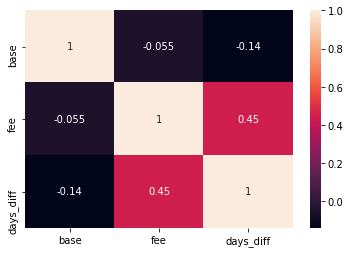

In [87]:
sns.heatmap(df.corr(), annot=True);

In [92]:
X = np.array(df[['base', 'days_diff']])

y = np.array(df['fee'])
y = pd.to_numeric(y)

In [90]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)

In [93]:
poly2 = PolynomialFeatures(degree=2, include_bias=True)
poly3 = PolynomialFeatures(degree=3, include_bias=True)
poly4 = PolynomialFeatures(degree=4, include_bias=True)

rmse_linear = 0
rmse_poly2 = 0
rmse_poly3 = 0
rmse_poly4 = 0
rmse_random_forest = 0

k_folds = 5
for fold in range(k_folds):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20)
    poly_features_train2 = poly2.fit_transform(X_train)
    poly_features_test2 = poly2.fit_transform(X_test)
    poly_features_train3 = poly3.fit_transform(X_train)
    poly_features_test3 = poly3.fit_transform(X_test)
    poly_features_train4 = poly4.fit_transform(X_train)
    poly_features_test4 = poly4.fit_transform(X_test)
    poly_reg_model2 = LinearRegression()
    poly_reg_model2.fit(poly_features_train2, y_train)
    poly_reg_model3 = LinearRegression()
    poly_reg_model3.fit(poly_features_train3, y_train)
    poly_reg_model4 = LinearRegression()
    poly_reg_model4.fit(poly_features_train4, y_train)
    
    y_pred2 = poly_reg_model2.predict(poly_features_test2)
    rmse_poly2 += mean_squared_error(y_test, y_pred2, squared=False)
    
    y_pred3 = poly_reg_model3.predict(poly_features_test3)
    rmse_poly3 += mean_squared_error(y_test, y_pred3, squared=False)

    y_pred4 = poly_reg_model4.predict(poly_features_test4)
    rmse_poly4 += mean_squared_error(y_test, y_pred4, squared=False)
    
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse_linear += mean_squared_error(y_test, y_pred, squared=False)
    
    reg_rf = RandomForestRegressor()
    reg_rf.fit(X_train, y_train)
    y_pred_rf = reg_rf.predict(X_test)
    rmse_random_forest += mean_squared_error(y_test, y_pred_rf, squared=False)
    
print('rmse_linear = ', rmse_linear/k_folds)
print('rmse_poly2 = ', rmse_poly2/k_folds)
print('rmse_poly3 = ', rmse_poly3/k_folds)
print('rmse_poly4 = ', rmse_poly4/k_folds)
print('rmse random forest = ', rmse_random_forest/k_folds)

rmse_linear =  10.876039768392916
rmse_poly2 =  10.439615847531275
rmse_poly3 =  11.526383292619485
rmse_poly4 =  12.35693311675721
rmse random forest =  11.307155103155441


# With period

In [95]:
df = pd.read_csv('with_period.csv', sep=';')
df['period start'] = pd.to_datetime(df['period start'])
df['period end'] = pd.to_datetime(df['period end'])
df = df[['base', 'rate', 'period start', 'period end', 'fee']]
df = df.replace(regex=[','],value='.')
df = df.dropna()
df['base'] = pd.to_numeric(df['base'])
df['fee'] = pd.to_numeric(df['fee'])
df['rate'] = pd.to_numeric(df['rate'])
df['days_diff'] = (df['period end'] - df['period start']).dt.days
df.head()

,base,rate,period start,period end,fee,days_diff
0,0.0,3.0,2021-02-17,2021-10-14,0.00,239
1,4587.0,1.8,2021-07-13,2021-08-19,8.37,37
2,470.0,3.0,2021-05-09,2021-11-23,3.05,198
3,9347.0,0.3,2021-05-20,2021-09-13,8.91,116
4,8310.0,0.6,2021-01-13,2021-01-31,2.46,18


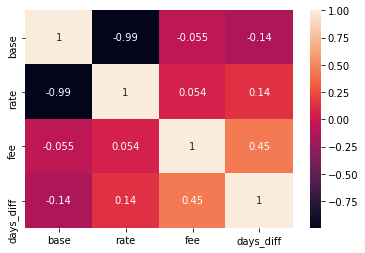

In [96]:
sns.heatmap(df.corr(), annot=True);

In [102]:
X = np.array(df[['base', 'rate', 'days_diff']])

y = np.array(df['fee'])
y = pd.to_numeric(y)

In [103]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)

In [104]:
poly2 = PolynomialFeatures(degree=2, include_bias=True)
poly3 = PolynomialFeatures(degree=3, include_bias=True)
poly4 = PolynomialFeatures(degree=4, include_bias=True)

rmse_linear = 0
rmse_poly2 = 0
rmse_poly3 = 0
rmse_poly4 = 0
rmse_random_forest = 0

k_folds = 5
for fold in range(k_folds):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20)
    poly_features_train2 = poly2.fit_transform(X_train)
    poly_features_test2 = poly2.fit_transform(X_test)
    poly_features_train3 = poly3.fit_transform(X_train)
    poly_features_test3 = poly3.fit_transform(X_test)
    poly_features_train4 = poly4.fit_transform(X_train)
    poly_features_test4 = poly4.fit_transform(X_test)
    poly_reg_model2 = LinearRegression()
    poly_reg_model2.fit(poly_features_train2, y_train)
    poly_reg_model3 = LinearRegression()
    poly_reg_model3.fit(poly_features_train3, y_train)
    poly_reg_model4 = LinearRegression()
    poly_reg_model4.fit(poly_features_train4, y_train)
    
    y_pred2 = poly_reg_model2.predict(poly_features_test2)
    rmse_poly2 += mean_squared_error(y_test, y_pred2, squared=False)
    
    y_pred3 = poly_reg_model3.predict(poly_features_test3)
    rmse_poly3 += mean_squared_error(y_test, y_pred3, squared=False)

    y_pred4 = poly_reg_model4.predict(poly_features_test4)
    rmse_poly4 += mean_squared_error(y_test, y_pred4, squared=False)
    
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse_linear += mean_squared_error(y_test, y_pred, squared=False)
    
    reg_rf = RandomForestRegressor()
    reg_rf.fit(X_train, y_train)
    y_pred_rf = reg_rf.predict(X_test)
    rmse_random_forest += mean_squared_error(y_test, y_pred_rf, squared=False)
    
print('rmse_linear = ', rmse_linear/k_folds)
print('rmse_poly2 = ', rmse_poly2/k_folds)
print('rmse_poly3 = ', rmse_poly3/k_folds)
print('rmse_poly4 = ', rmse_poly4/k_folds)
print('rmse random forest = ', rmse_random_forest/k_folds)

rmse_linear =  11.777530403075335
rmse_poly2 =  11.697844344816364
rmse_poly3 =  13.09128291940576
rmse_poly4 =  27.399121108464293
rmse random forest =  13.732047204364637
